# EDA (Разведочный анализ данных)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('processed_data.csv', ';').drop("Unnamed: 0", axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                3664 non-null   object 
 1   district               3664 non-null   object 
 2   number of floors       3664 non-null   object 
 3   apartment floor        3664 non-null   float64
 4   number of rooms        3664 non-null   int64  
 5   area of apartment      3664 non-null   float64
 6   bathroom               3664 non-null   object 
 7   repair                 3664 non-null   object 
 8   view from the windows  3664 non-null   object 
 9   terrace                3664 non-null   object 
 10  garbage chute          3664 non-null   bool   
 11  type of house          3664 non-null   object 
 12  parking                3664 non-null   object 
 13  concierge              3664 non-null   bool   
 14  elevator               3664 non-null   bool   
 15  link

Некоторые поля имеют неожидаемые типы. Необходимо их дополнительно предпобработать

In [4]:
df['number of floors'] = np.array(list(map(lambda x: int(re.findall('[\d]+', x)[0]), df['number of floors'].values)))

In [5]:
df['apartment floor'] = df['apartment floor'].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                3664 non-null   object 
 1   district               3664 non-null   object 
 2   number of floors       3664 non-null   int32  
 3   apartment floor        3664 non-null   int32  
 4   number of rooms        3664 non-null   int64  
 5   area of apartment      3664 non-null   float64
 6   bathroom               3664 non-null   object 
 7   repair                 3664 non-null   object 
 8   view from the windows  3664 non-null   object 
 9   terrace                3664 non-null   object 
 10  garbage chute          3664 non-null   bool   
 11  type of house          3664 non-null   object 
 12  parking                3664 non-null   object 
 13  concierge              3664 non-null   bool   
 14  elevator               3664 non-null   bool   
 15  link

Теперь типы соответствуют ожиданиям

## Исследование численных признаков

In [7]:
df.describe()

,number of floors,apartment floor,number of rooms,area of apartment,price
count,3664.000000,3664.000000,3664.000000,3664.000000,3.664000e+03
mean,11.168395,5.923035,2.049400,54.314820,5.400599e+08
std,6.696842,4.742058,0.934967,26.425822,3.244619e+10
min,1.000000,1.000000,1.000000,11.900000,4.600000e+05
25%,5.000000,3.000000,1.000000,37.975000,2.620000e+06
50%,9.000000,5.000000,2.000000,48.000000,3.489000e+06
75%,16.000000,8.000000,3.000000,63.000000,4.600000e+06
max,31.000000,31.000000,6.000000,502.000000,1.964004e+12


### Борьба с выбросами

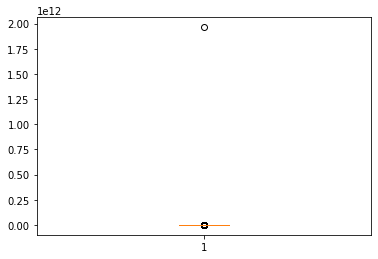

In [8]:
box = plt.boxplot(df['price'])

Данные о цене содержат выбросы, необходимо от них избавиться, взяв в расчет только цены, которые меньше 90-ого процентиля

In [9]:
percentile_90 = np.percentile(df['price'], 90)
df = df[df['price'] < percentile_90]

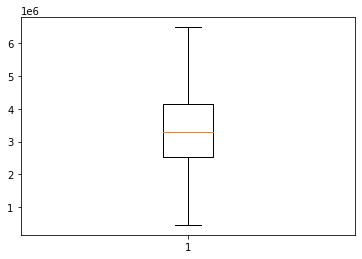

In [10]:
box = plt.boxplot(df['price'])

Text(0, 0.5, 'Площадь квартиры')

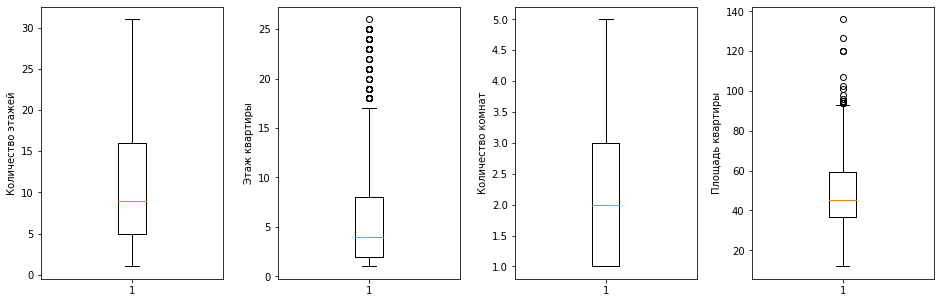

In [11]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
_ = plt.subplots_adjust(wspace=0.3, hspace=0)
_ = ax1.boxplot(df['number of floors'])
ax1.set_ylabel("Количество этажей")
_ = ax2.boxplot(df['apartment floor'])
ax2.set_ylabel("Этаж квартиры")
_ = ax3.boxplot(df['number of rooms'])
ax3.set_ylabel("Количество комнат")
_ = ax4.boxplot(df['area of apartment'])
ax4.set_ylabel("Площадь квартиры")

Остальные числовые данные в удалении выбросов не нуждаются, кроме одной квартиры, площадь которой превышает 120

In [12]:
df = df[df['area of apartment'] < 120]

### Корреляции

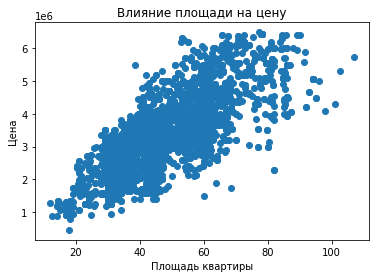

In [13]:
plt.title("Влияние площади на цену")
plt.xlabel("Площадь квартиры")
plt.ylabel("Цена")
plt.scatter(df['area of apartment'], df['price'])

Влияние прослеживается, попробуем дополнительно вычислить коэффициент корреляции Пирсона

In [14]:
print("Коэффициент корреляции Пирсона между площадью и ценой", np.corrcoef(df['area of apartment'], df['price'])[0, 1])

Коэффициент корреляции Пирсона между площадью и ценой 0.7629450040695513


Уровень корреляции средний

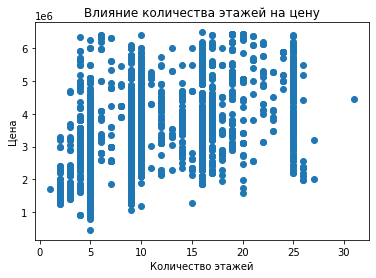

In [15]:
plt.title("Влияние количества этажей на цену")
plt.xlabel("Количество этажей")
plt.ylabel("Цена")
plt.scatter(df['number of floors'], df['price'])

In [16]:
print("Коэффициент корреляции Пирсона между количеством этажей и ценой", np.corrcoef(df['number of floors'], df['price'])[0, 1])

Коэффициент корреляции Пирсона между количеством этажей и ценой 0.48179708850568204


Уровень корреляции слабый

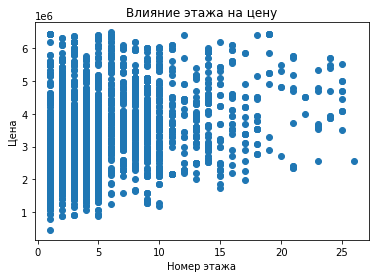

In [17]:
plt.title("Влияние этажа на цену")
plt.xlabel("Номер этажа")
plt.ylabel("Цена")
plt.scatter(df['apartment floor'], df['price'])

In [18]:
print("Коэффициент корреляции Пирсона между этажом и ценой", np.corrcoef(df['apartment floor'], df['price'])[0, 1])

Коэффициент корреляции Пирсона между этажом и ценой 0.2885543687099973


Уровень корреляции слабый

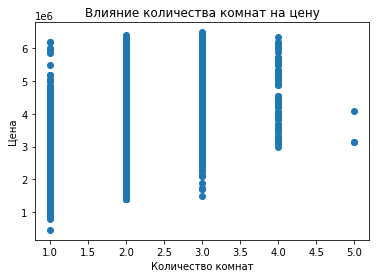

In [19]:
plt.title("Влияние количества комнат на цену")
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.scatter(df['number of rooms'], df['price'])

In [20]:
print("Коэффициент корреляции Пирсона между количеством комнат и ценой", np.corrcoef(df['number of rooms'], df['price'])[0, 1])

Коэффициент корреляции Пирсона между количеством комнат и ценой 0.5210054467470768


Уровень корреляции слабый

<AxesSubplot:>

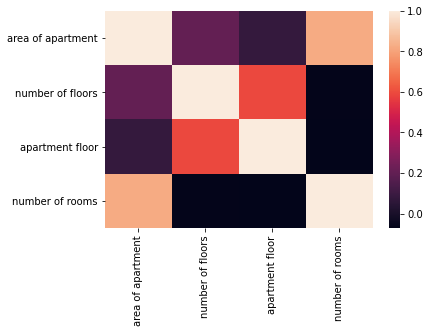

In [21]:
import seaborn as sns
corr_table = df[['area of apartment', 'number of floors', 'apartment floor', 'number of rooms']].corr()
sns.heatmap(corr_table)

## Исследование категориальных признаков

In [22]:
df.describe(include="object")

,address,district,bathroom,repair,view from the windows,terrace,type of house,parking,link
count,3285,3285,3285,3285,3285,3285,3285,3285,3285
unique,1407,7,3,4,3,3,6,16,1957
top,"ул. Гашкова, д. 51, корп. 2",р-н Свердловский,совмещенный,косметический,во двор,лоджия,кирпичный,открытая во дворе,https://www.avito.ru/perm/kvartiry/1-k._kvarti...
freq,79,745,1881,2412,1566,1474,1425,2186,19


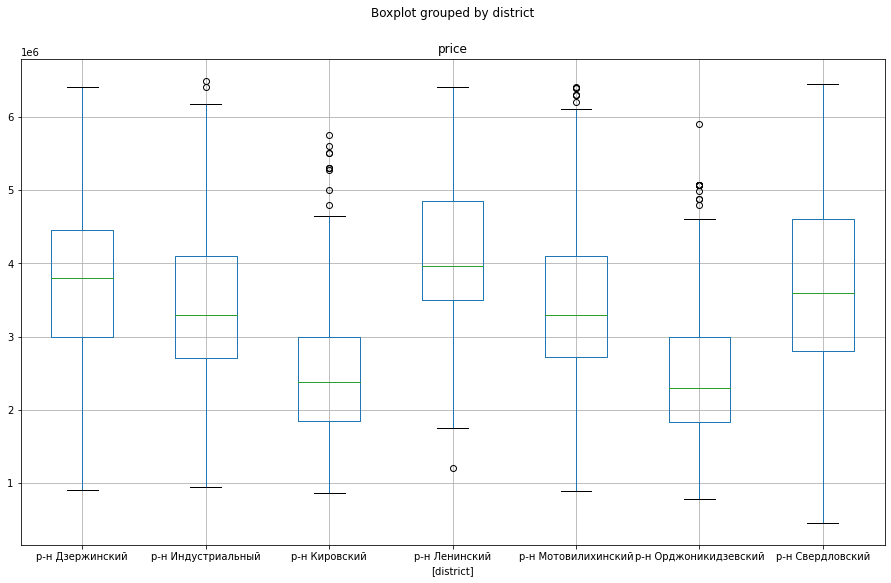

In [23]:
box = df.boxplot(column=['price'], by=['district'], figsize=(15, 9))

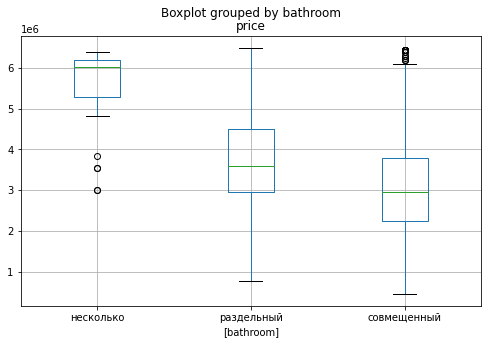

In [24]:
box = df.boxplot(column=['price'], by=['bathroom'], figsize=(8, 5))

По графику видно, что тип ванной влияет на цену

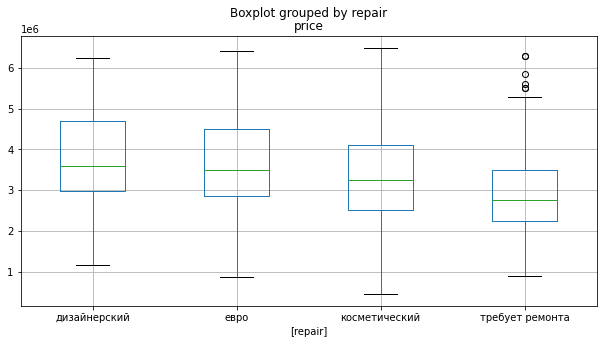

In [25]:
box = df.boxplot(column=['price'], by=['repair'], figsize=(10, 5))

По графику видно, что отличительным ценовым показателем является именно дизайнерский ремонт

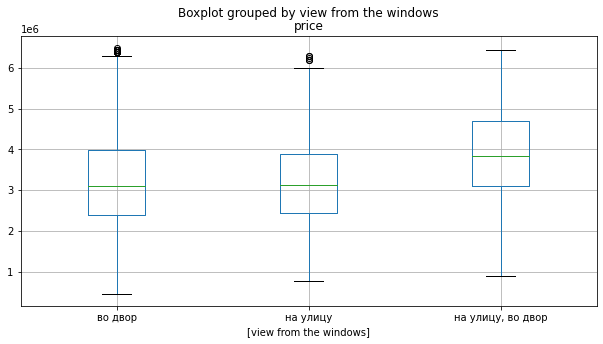

In [26]:
box = df.boxplot(column=['price'], by=['view from the windows'], figsize=(10, 5))

По графику видно, что вид из окна не влияет сильно

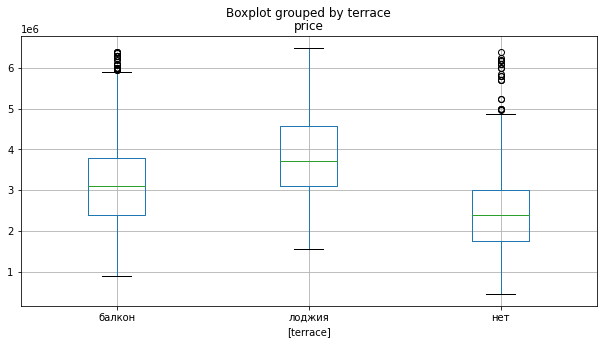

In [27]:
box = df.boxplot(column=['price'], by=['terrace'], figsize=(10, 5))

По графику видно, что тип балкона влияет на цену

In [28]:
df['type of house'].unique()

array(['панельный', 'монолитный', 'кирпичный', 'блочный',
       'Серая панель. Дома этой серии испытаны временем, проживание в них комфортно и удобно, а сама квартира теплая, сухая, солнечная. Комнаты 2+1, одна изолирована и две смежные Кухня 7.7 кв.м. Две застекленные лоджии. Выход на лоджии из двух комнат. В одной из лоджии можно сделать кабинет или детский уголок!!! Раздельный санузел. Состояние обычное, можно заехать и жить. Есть возможность воплотить все свои дизайнерские фантазии, квартира без всяких перепланировок. Отличный вариант для семьи с детьми, чтобы жить современно и независимо. Дружелюбный дом с большой придомовой территорией и вместительной парковкой. Опрятный, чистый подъезд. Множество разнообразных магазинов, торговые центры, кафе, лицеи №3 и №8, д\\с, детская поликлиника - все в шаговой доступности! Отличная транспортная развязка. Остановка рядом. Возможен обмен на 1 комн. квартиру. Звоните! Показ в удобное для Вас время!',
       'Ленинградский проект . Дом кирпич

Неожиданные значения типа дома нужно подкорректировать

In [29]:
def hot_correct(text):
    if 'Серая панель' in text:
        return "панельный"
    elif 'Дом кирпичный' in text:
        return "кирпичный"
    else:
        return text

df['type of house'] = np.array(list(map(lambda x: hot_correct(x), df['type of house'].values)))

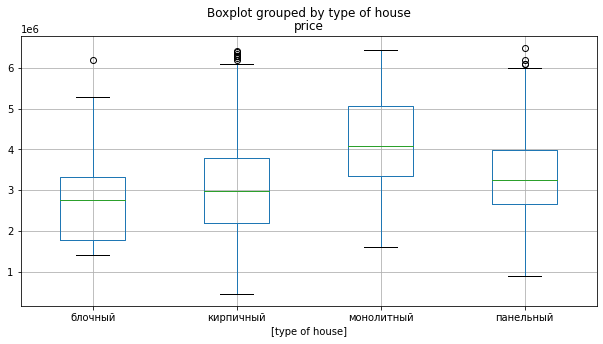

In [30]:
box = df.boxplot(column=['price'], by=['type of house'], figsize=(10, 5))

По графику видно, что тип дома влияет на цену

In [37]:
df['parking'].unique()

array(['открытая во дворе', 'подземная, открытая во дворе',
       'подземная, за шлагбаумом во дворе', 'за шлагбаумом во дворе',
       'подземная', 'наземная многоуровневая, открытая во дворе',
       'подземная, наземная многоуровневая, за шлагбаумом во дворе',
       'наземная многоуровневая',
       'подземная, за шлагбаумом во дворе, открытая во дворе',
       'за шлагбаумом во дворе, открытая во дворе',
       'наземная многоуровневая, за шлагбаумом во дворе, открытая во дворе',
       'наземная многоуровневая, за шлагбаумом во дворе',
       'подземная, наземная многоуровневая, открытая во дворе',
       'подземная, наземная многоуровневая, за шлагбаумом во дворе, открытая во дворе',
       'подземная, наземная многоуровневая',
       'общая, на территории.•\tУсловие: обременение снято, выделены доли детям, органы опеки.•\tПреимущества: новый микрорайон, детские площадки, магазины.'],
      dtype=object)

Необходимо разбить тип парковки на несколько столбцов

In [38]:
all_rus_types = ['подземная', 'наземная многоуровневая', 'открытая во дворе', 'за шлагбаумом во дворе']

In [39]:
all_eng_types = ['underground', 'ground multi-level', 'open in the courtyard', 'behind the barrier in the yard']

In [40]:
def divide_parking(text, index):
    if all_rus_types[index] in text:
        return 1
    else:
        return 0

for index, type_ in enumerate(all_eng_types):
    df[type_] = np.array(list(map(lambda x: divide_parking(x, index), df['parking'].values)))

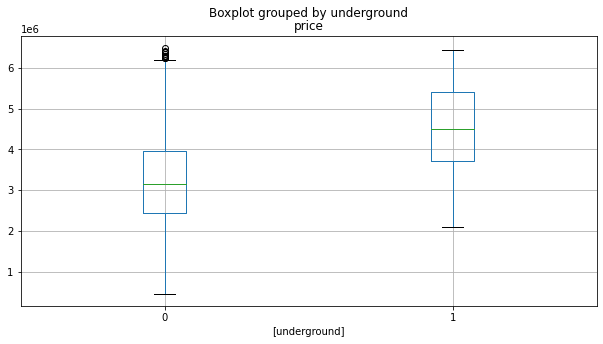

In [41]:
box = df.boxplot(column=['price'], by=['underground'], figsize=(10, 5))

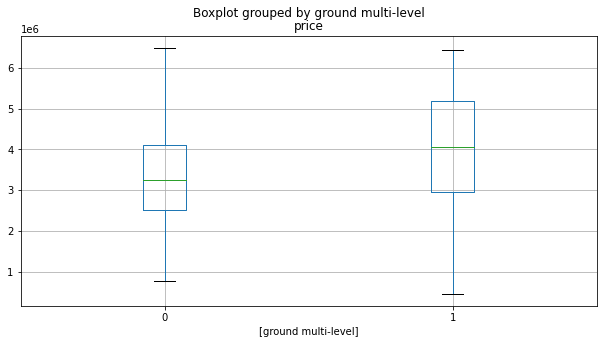

In [42]:
box = df.boxplot(column=['price'], by=['ground multi-level'], figsize=(10, 5))

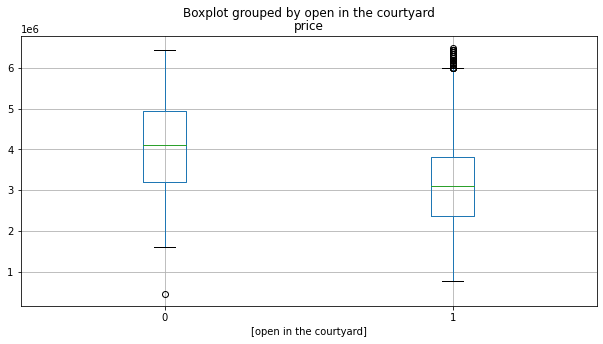

In [43]:
box = df.boxplot(column=['price'], by=['open in the courtyard'], figsize=(10, 5))

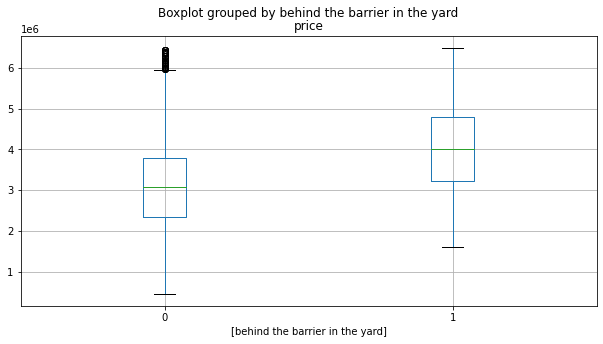

In [44]:
box = df.boxplot(column=['price'], by=['behind the barrier in the yard'], figsize=(10, 5))

По графикам видно, что какое-то влияние есть

## Исследование логических признаков

In [46]:
df.describe(include='bool')

,garbage chute,concierge,elevator
count,3285,3285,3285
unique,2,2,2
top,False,False,True
freq,2561,2823,2547


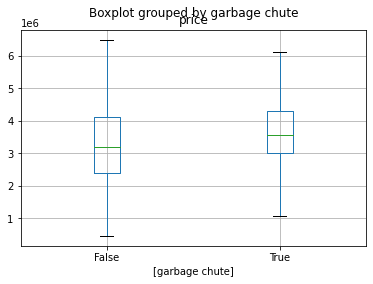

In [47]:
box = df.boxplot(column=['price'], by=['garbage chute'])

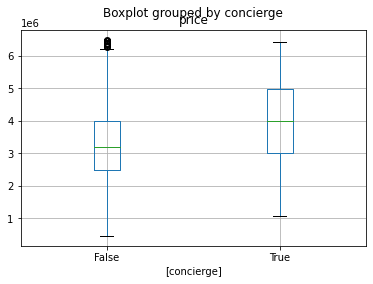

In [48]:
box = df.boxplot(column=['price'], by=['concierge'])

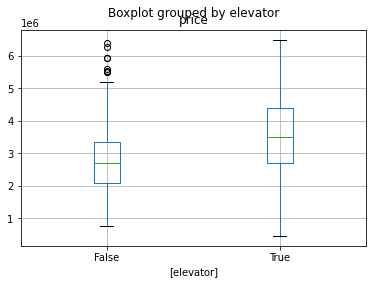

In [49]:
box = df.boxplot(column=['price'], by=['elevator'])

Можно сделать общий вывод, что наличие дополнительных услуг, увеличивает цену на квартиру

## Формируем данные для обучения

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 0 to 3662
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   address                         3285 non-null   object 
 1   district                        3285 non-null   object 
 2   number of floors                3285 non-null   int32  
 3   apartment floor                 3285 non-null   int32  
 4   number of rooms                 3285 non-null   int64  
 5   area of apartment               3285 non-null   float64
 6   bathroom                        3285 non-null   object 
 7   repair                          3285 non-null   object 
 8   view from the windows           3285 non-null   object 
 9   terrace                         3285 non-null   object 
 10  garbage chute                   3285 non-null   bool   
 11  type of house                   3285 non-null   object 
 12  parking                         32

In [58]:
df = df.drop(['address', 'link'], axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 0 to 3662
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   district                        3285 non-null   object 
 1   number of floors                3285 non-null   int32  
 2   apartment floor                 3285 non-null   int32  
 3   number of rooms                 3285 non-null   int64  
 4   area of apartment               3285 non-null   float64
 5   bathroom                        3285 non-null   object 
 6   repair                          3285 non-null   object 
 7   view from the windows           3285 non-null   object 
 8   terrace                         3285 non-null   object 
 9   garbage chute                   3285 non-null   bool   
 10  type of house                   3285 non-null   object 
 11  parking                         3285 non-null   object 
 12  concierge                       32

In [66]:
ndf = df.copy()

In [115]:
district_enc = OneHotEncoder()
district_df = pd.DataFrame(district_enc.fit_transform(ndf[['district']]).toarray())
district_df.columns = [feature[3:] for feature in district_enc.get_feature_names()]
district_df.head()

,р-н Дзержинский,р-н Индустриальный,р-н Кировский,р-н Ленинский,р-н Мотовилихинский,р-н Орджоникидзевский,р-н Свердловский
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
bath_enc = OneHotEncoder()
bath_df = pd.DataFrame(bath_enc.fit_transform(ndf[['bathroom']]).toarray())
bath_df.columns = [feature[3:] for feature in bath_enc.get_feature_names()]
bath_df.head()

,несколько,раздельный,совмещенный
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [117]:
repair_enc = OneHotEncoder()
repair_df = pd.DataFrame(repair_enc.fit_transform(ndf[['repair']]).toarray())
repair_df.columns = [feature[3:] for feature in repair_enc.get_feature_names()]
repair_df.head()

,дизайнерский,евро,косметический,требует ремонта
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [118]:
terrace_enc = OneHotEncoder()
terrace_df = pd.DataFrame(terrace_enc.fit_transform(ndf[['terrace']]).toarray())
terrace_df.columns = [feature[3:] for feature in terrace_enc.get_feature_names()]
terrace_df.head()

,балкон,лоджия,нет
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [119]:
type_house_enc = OneHotEncoder()
type_house_df = pd.DataFrame(type_house_enc.fit_transform(ndf[['type of house']]).toarray())
type_house_df.columns = [feature[3:] for feature in type_house_enc.get_feature_names()]
type_house_df.head()

,блочный,кирпичный,монолитный,панельный
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [138]:
new_df = df[['number of floors', 'apartment floor', 'number of rooms', 'area of apartment',
            'garbage chute', 'concierge', 'elevator', 'underground', 'ground multi-level',
            'open in the courtyard', 'behind the barrier in the yard']]

In [139]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 0 to 3662
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   number of floors                3285 non-null   int32  
 1   apartment floor                 3285 non-null   int32  
 2   number of rooms                 3285 non-null   int64  
 3   area of apartment               3285 non-null   float64
 4   garbage chute                   3285 non-null   bool   
 5   concierge                       3285 non-null   bool   
 6   elevator                        3285 non-null   bool   
 7   underground                     3285 non-null   int32  
 8   ground multi-level              3285 non-null   int32  
 9   open in the courtyard           3285 non-null   int32  
 10  behind the barrier in the yard  3285 non-null   int32  
dtypes: bool(3), float64(1), int32(6), int64(1)
memory usage: 292.6 KB


In [140]:
new_df = new_df.join(district_df)
new_df = new_df.join(bath_df)
new_df = new_df.join(repair_df)
new_df = new_df.join(terrace_df)
new_df = new_df.join(type_house_df)

In [141]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 0 to 3662
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   number of floors                3285 non-null   int32  
 1   apartment floor                 3285 non-null   int32  
 2   number of rooms                 3285 non-null   int64  
 3   area of apartment               3285 non-null   float64
 4   garbage chute                   3285 non-null   bool   
 5   concierge                       3285 non-null   bool   
 6   elevator                        3285 non-null   bool   
 7   underground                     3285 non-null   int32  
 8   ground multi-level              3285 non-null   int32  
 9   open in the courtyard           3285 non-null   int32  
 10  behind the barrier in the yard  3285 non-null   int32  
 11  р-н Дзержинский                 2948 non-null   float64
 12  р-н Индустриальный              29

In [151]:
for column in new_df.columns[4:]:
    new_df[column] = new_df[column].astype('byte')

In [152]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 0 to 3662
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   number of floors                3285 non-null   int32  
 1   apartment floor                 3285 non-null   int32  
 2   number of rooms                 3285 non-null   int64  
 3   area of apartment               3285 non-null   float64
 4   garbage chute                   3285 non-null   int8   
 5   concierge                       3285 non-null   int8   
 6   elevator                        3285 non-null   int8   
 7   underground                     3285 non-null   int8   
 8   ground multi-level              3285 non-null   int8   
 9   open in the courtyard           3285 non-null   int8   
 10  behind the barrier in the yard  3285 non-null   int8   
 11  р-н Дзержинский                 3285 non-null   int8   
 12  р-н Индустриальный              32

In [153]:
new_df.to_csv('after_eda_data.csv', sep=';', index=False)

In [154]:
df = pd.read_csv('after_eda_data.csv', sep=';')

In [155]:
df

,number of floors,apartment floor,number of rooms,area of apartment,garbage chute,concierge,elevator,underground,ground multi-level,open in the courtyard,...,евро,косметический,требует ремонта,балкон,лоджия,нет,блочный,кирпичный,монолитный,панельный
0,5,1,3,61.2,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,5,1,3,61.2,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,17,4,3,68.6,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,17,4,3,68.6,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,16,6,2,54.1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,10,2,1,48.0,0,0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3281,5,4,2,38.5,0,0,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
3282,5,4,2,38.5,0,0,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
3283,5,4,2,38.5,0,0,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
